In [29]:
import pandas as pd
import plotnine as p9
from plotnine import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image
from IPython.core.display import HTML 

# What makes TikTok tick?
**Exploration of attributes that make a popular TikTok song**

*Sameerah Helal, Radhika Kulkarni, Kevin Xu, Darya Petrov*
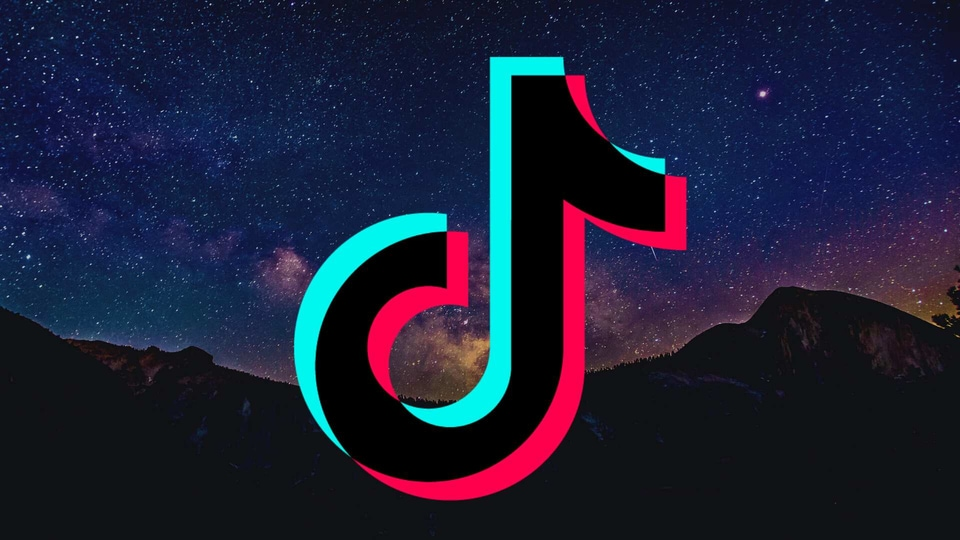


## Motivation 

TikTok has been around for a couple years, and in that time has managed to capture a worldwide audience with its enticing songs and consumable content. With music being an important component of TikTok's short-form content, we want to investigate what makes songs on TikTok popular to current audiences. We can compare features of popular TikTok songs to popular songs in the United States to estimate relationships.

## Intention

Our intention is to explore and extract relationships between features of two playlists, TikTok songs from the playlist posted by TikTok on Spotify, and the top songs from 2019-2021 as a concatenated playlist extracted from Spotify. We plan to explore the density of popular TikTok song features, explore correlation between TikTok song features, visualize relationships/trends between features of playlists, and compare TikTok songs to Top songs.

## Data

Playlists: 

1. TikTok Hits by TikTok
2. Top Hits of 2019 by Spotify 
3. Top Tracks of 2020 by Spotify 
4. Top Hits of 2021 by NiCampos

Source: Spotify's API

* Created an app (141b) in our Spotify Developer Account: 
    - Client that requests access to protected resources
    - HTTPS requests in UTF-8 format to an API endpoint
    - Followed the 'Client Credentials' OAUTH flow from Spotify which gives us access to public data
    - The system authenticates and authorizes the app rather than a user
    - API gives a json format
* Parsed json file and extract features into a dataframe 

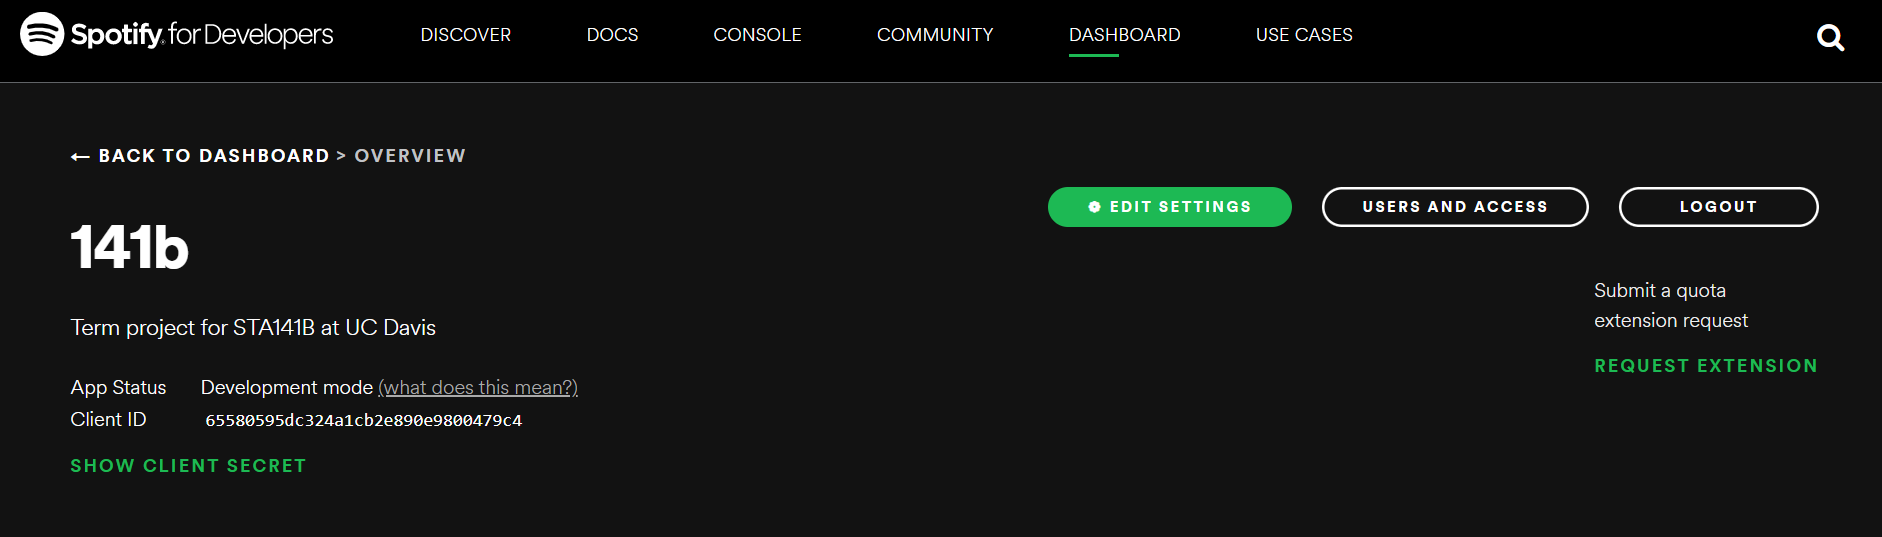

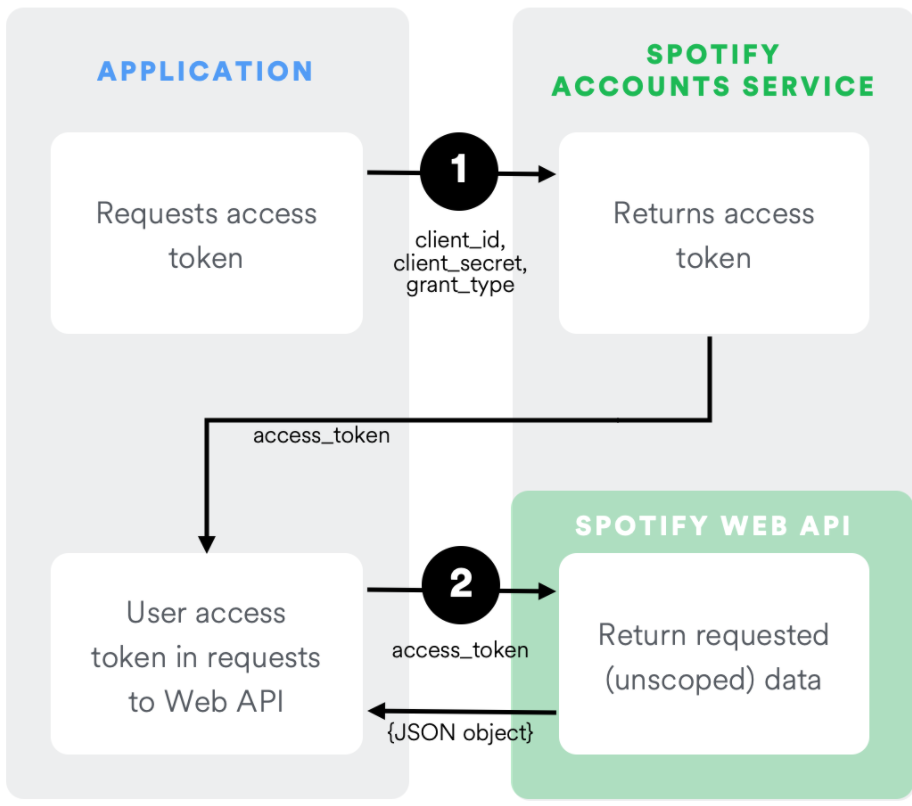

# JSON 

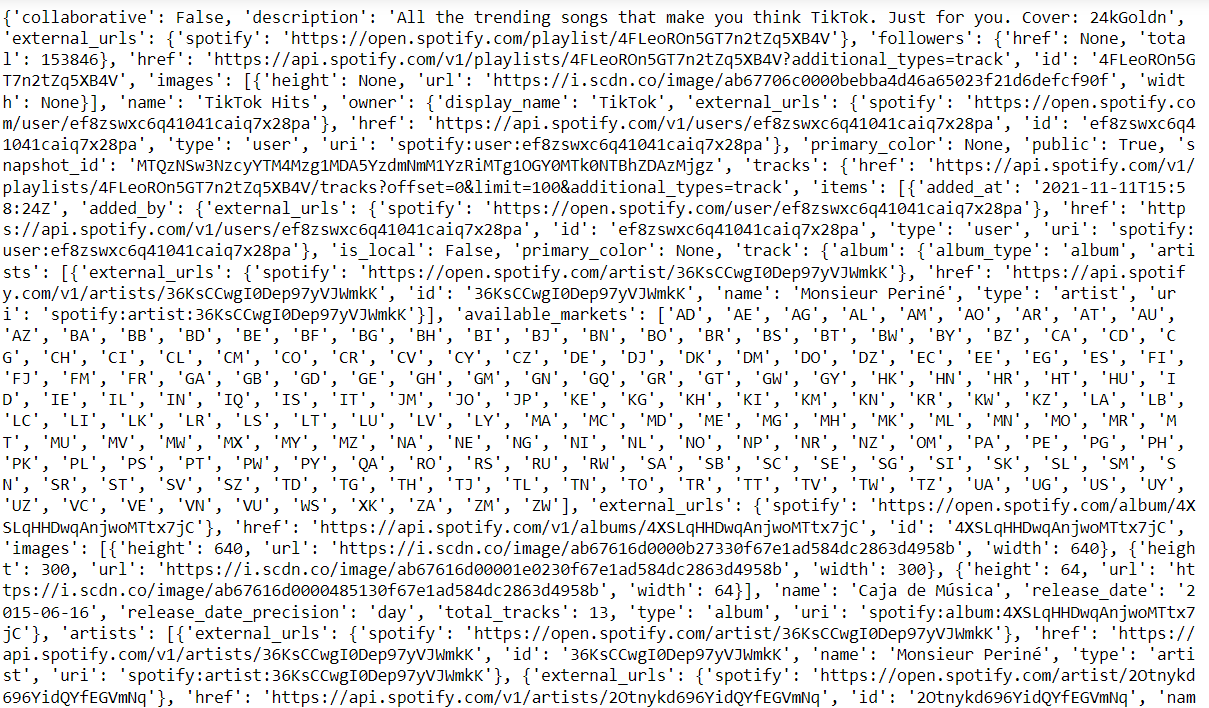

## Variable Descriptions

**id**: (string) The Spotify ID for the track.

**title**: (string) The name of the song for the track. 

**all_artists**: (string) The name of the artists for the song.

**popularity**: (int) Popularity is measured on a scale from 0-100 of how popular the song is. "[P]opularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past"

**release_date**: (string) The date on which the track was released for listening on Spotify, represented in yyyy-mm-dd format.

**danceability**: (float) Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**: (float) Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**key**: (int) The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. >= -1, <= 11

**loudness**: (float) The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**: (int) Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**acousticness**: (float) A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. >= 0 <= 1

**instrumentalness**: (float) Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness**: (float) Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**valence**: (float) A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). >= 0 <= 1

**tempo**: (float) The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration_ms**: (int) The duration of the track in milliseconds.

**time_signature**: (int) An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". >= 3 <= 7

## Extract Data

## Load in Data

In [3]:
#load in data
tiktok_data = pd.read_csv("TikTok_Playlist.csv")

# Reformatting Dates
tiktok_data.release_date = pd.to_datetime(tiktok_data.release_date)

#Scaling popularity 
tiktok_data["popularity_scaled"] = tiktok_data["popularity"]/100

tiktok_data.head()

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_scaled
0,5reQI13tWWYDLMrGcUF4Mk,Nuestra Canción,"['Monsieur Periné', 'Vicente Garcia']",83,2015-06-16,0.906,0.731,6,-7.021,0,0.426,0.000005,0.0853,0.794,106.995,260080,4,0.83
1,6M47gaKejso9772SKTa3yH,Face Off,"['Tech N9ne', 'Joey Cool', 'King Iso', 'Dwayne...",81,2021-10-08,0.693,0.935,8,-4.323,1,0.180,0.000000,0.1790,0.391,80.882,219802,4,0.81
2,4IhTXiZLKATmwhMZIb1GQN,Lights Are On,['Tom Rosenthal'],78,2018-10-26,0.440,0.040,3,-16.887,1,0.981,0.465000,0.1110,0.249,135.965,193749,4,0.78
3,15HMh4yxdf4wyxSZSlOgGZ,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,"['Amaarae', 'Kali Uchis', 'Moliy']",88,2021-09-16,0.859,0.525,1,-8.051,0,0.434,0.000023,0.1080,0.312,110.066,204764,4,0.88
4,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,['Adele'],100,2021-10-14,0.604,0.366,5,-7.519,1,0.578,0.000000,0.1330,0.130,141.981,224695,4,1.00


In [4]:
#read in the csv files from data
top2019 = pd.read_csv("Popular_Playlist_2019.csv")
top2019=top2019.set_index("id")
top2020 = pd.read_csv("Popular_Playlist_2020.csv")
top2020=top2020.set_index("id")
top2021 = pd.read_csv("Popular_Playlist_2021.csv")
top2021=top2021.set_index("id")

#data munging: concatenation and dropping any duplicate entries
topSongs = pd.concat([top2019,top2020,top2021]).drop_duplicates()

#reset the index after the dropping of duplicates
topSongs = topSongs.reset_index()

#reformatting Dates
topSongs.release_date = pd.to_datetime(topSongs.release_date)

topSongs.head()

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,"['Lil Nas X', 'Billy Ray Cyrus']",80,2019-06-21,0.878,0.619,6,-5.560,1,0.0533,0.00,0.1130,0.639,136.041,157067,4
1,2Fxmhks0bxGSBdJ92vM42m,bad guy,['Billie Eilish'],85,2019-03-29,0.701,0.425,7,-10.965,1,0.3280,0.13,0.1000,0.562,135.128,194088,4
2,6v3KW9xbzN5yKLt9YKDYA2,Señorita,"['Shawn Mendes', 'Camila Cabello']",79,2019-06-19,0.759,0.548,9,-6.049,0,0.0392,0.00,0.0828,0.749,116.967,190800,4
3,6ocbgoVGwYJhOv1GgI9NsF,7 rings,['Ariana Grande'],85,2019-02-08,0.778,0.317,1,-10.732,0,0.5920,0.00,0.0881,0.327,140.048,178627,4
4,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,"['Post Malone', 'Swae Lee']",80,2019-09-06,0.755,0.522,2,-4.368,1,0.5330,0.00,0.0685,0.925,89.960,157560,4


## Visualizations

In [5]:
#subsetting variables that are interpretable when scaled to 0 to 1
quant01 = ['danceability', 'energy', 
    'acousticness', 'liveness',
       'valence',"popularity_scaled"]
colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9','#bae1ff',"#D5D6EA"]
facetdf01 = pd.melt(tiktok_data, id_vars=['id'], value_vars=quant01)

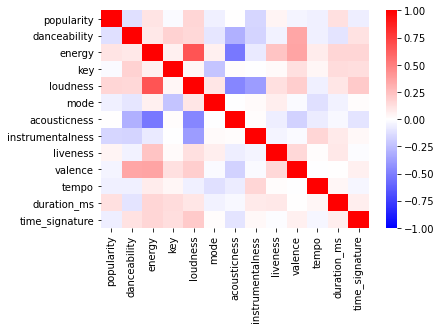

In [8]:
# Plot 1: Heat Map/ Correlation Matrix TikTokSongs 
corr = tiktok_data.corr()
corr.style.set_precision(3).background_gradient(cmap='bwr', vmin=-1, vmax=1)
_ = sns.heatmap(tiktok_data.drop("popularity_scaled",axis=1).corr(), vmin = -1, vmax = 1, cmap = 'bwr') 

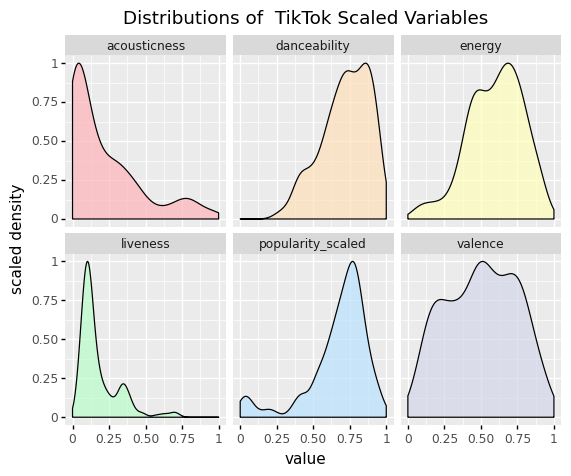

In [9]:
# Plot 2: Distributions of Scaled Variables TikTok Songs
gg = p9.ggplot(facetdf01, p9.aes(x='value', y = after_stat("scaled"), fill = 'factor(variable)'))
gg += p9.geom_density(alpha = 0.7, show_legend=False)
gg += p9.facet_wrap('~variable') 
gg += p9.scale_fill_manual(values = colors)
gg += p9.ggtitle("Distributions of  TikTok Scaled Variables")
gg += p9.labels.ylab("scaled density")
gg.draw();

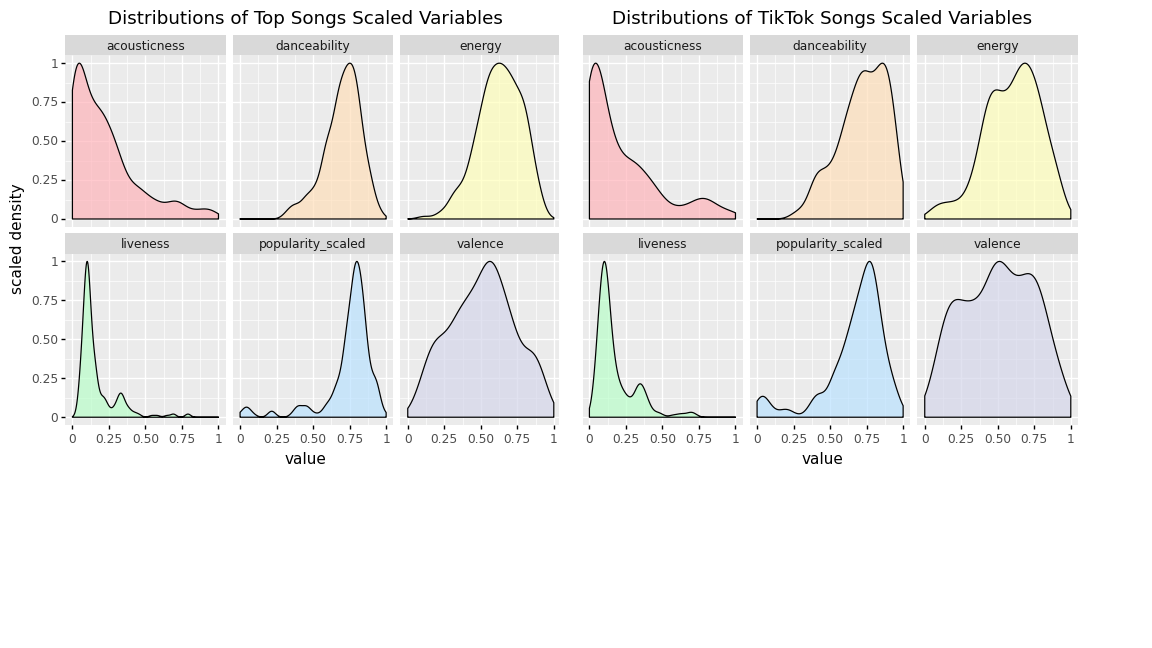

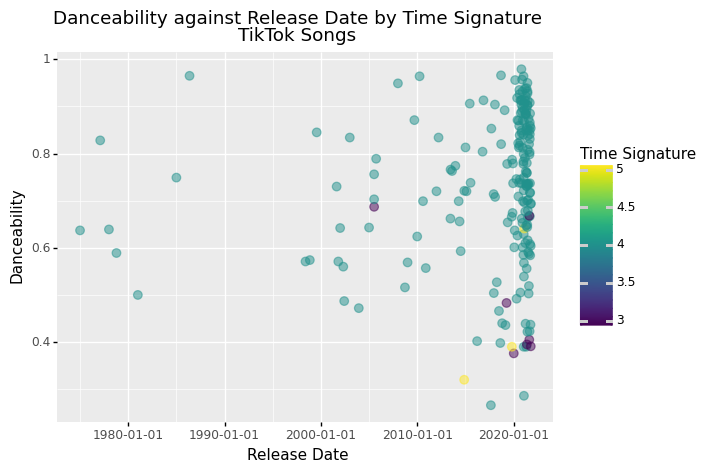

In [11]:
# Plot 4: Danceability against Release date by color Time Signature TikTok Songs
#replace tiktok_data df with topSongs df to get the second plot in the side-by-side below         
plot4 = p9.ggplot(tiktok_data, p9.aes(x='release_date', y = "danceability", color = "time_signature") )
plot4 += p9.geom_count(alpha = 0.5, size = 3)
plot4 += p9.ggtitle('Danceability against Release Date by Time Signature\nTikTok Songs')
plot4 += p9.labels.ylab("Danceability")
plot4 += p9.labels.xlab("Release Date")
plot4 += p9.labs(color='Time Signature') 
plot4.draw();                  

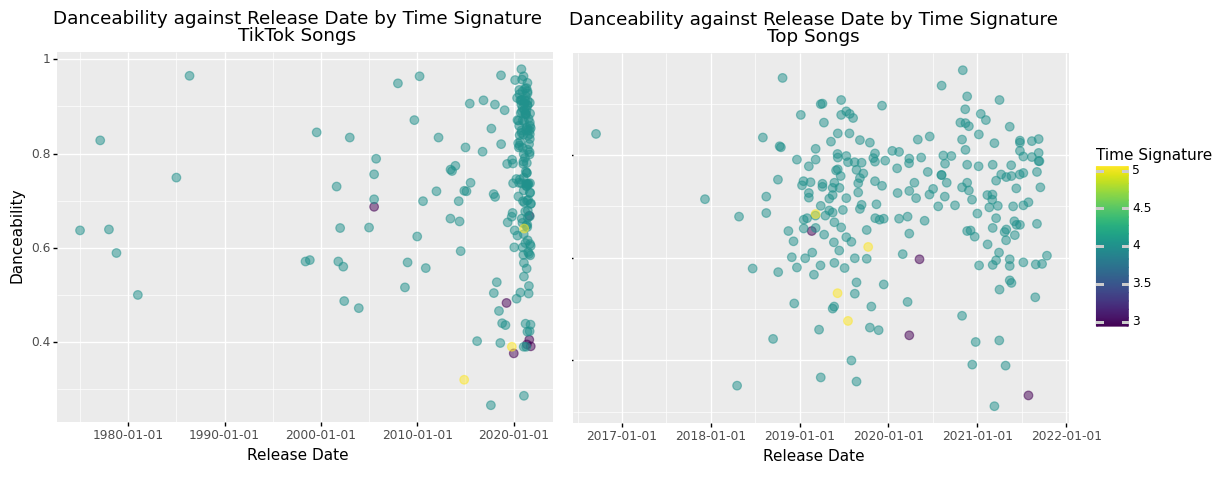

Since TikTok clips are in short-clip format, the song audio snippet which is used in a TikTok must stand out in some way for users and content creators to find it popular. We will investigate how the duration (minutes) of a song in top songs may differ from the duration of TikTok songs and note any trends between duration and popularity of songs for both data sources.

We perform data munging by first rearranging the rows of both `topSongs` and `tiktok_data` dataframes in order of popularity, from highest value to lowest value, then resetting the index.

In [12]:
#sort topSongs by popularity and reset the index, display head
topSongs_sorted = topSongs.sort_values('popularity', ascending = False)
topSongs_sorted = topSongs_sorted.reset_index()
topSongs_sorted.head()

,index,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,145,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,['Adele'],100,2021-10-14,0.604,0.366,5,-7.519,1,0.5780,0.000000,0.1330,0.130,141.981,224695,4
1,152,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),"['The Kid LAROI', 'Justin Bieber']",97,2021-07-09,0.591,0.764,1,-5.484,1,0.0383,0.000000,0.1030,0.478,169.928,141806,4
2,219,6Uj1ctrBOjOas8xZXGqKk4,Woman,['Doja Cat'],95,2021-06-25,0.824,0.764,5,-4.175,0,0.0888,0.002940,0.1170,0.881,107.998,172627,4
3,231,6zSpb8dQRaw0M1dK8PBwQz,Cold Heart - PNAU Remix,"['Elton John', 'Dua Lipa', 'PNAU']",95,2021-08-13,0.796,0.798,1,-6.312,1,0.0340,0.000042,0.0952,0.942,116.032,202735,4
4,236,2Xr1dTzJee307rmrkt8c0g,love nwantiti (ah ah ah),['CKay'],94,2019-08-30,0.727,0.739,8,-3.805,1,0.3650,0.001370,0.1610,0.533,93.005,145800,4


In [13]:
#sort tiktok songs by popularity and reset the index, display head
tiktok_sorted = tiktok_data.sort_values('popularity', ascending = False)
tiktok_sorted = tiktok_sorted.reset_index()
tiktok_sorted.head()

,index,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_scaled
0,4,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,['Adele'],100,2021-10-14,0.604,0.366,5,-7.519,1,0.57800,0.0,0.1330,0.130,141.981,224695,4,1.00
1,52,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),"['The Kid LAROI', 'Justin Bieber']",97,2021-07-09,0.591,0.764,1,-5.484,1,0.03830,0.0,0.1030,0.478,169.928,141806,4,0.97
2,58,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),"['Lil Nas X', 'Jack Harlow']",96,2021-07-23,0.736,0.704,3,-7.409,0,0.02030,0.0,0.0501,0.894,149.995,212000,4,0.96
3,74,3Wrjm47oTz2sjIgck11l5e,Beggin',['Måneskin'],94,2017-12-08,0.714,0.800,11,-4.808,0,0.12700,0.0,0.3590,0.589,134.002,211560,4,0.94
4,29,0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,['Lil Nas X'],94,2021-09-17,0.737,0.846,1,-4.510,0,0.00614,0.0,0.0486,0.546,87.981,143901,4,0.94


We can see from the head of each of the sorted playlists that the first two most popular songs for tiktok and for top songs in the last three years are "Easy On Me" by Adele and "STAY" by The Kid LAROI and Justin Bieber. We can connect some popularity of a song in the last three years to Tiktok popular songs because Tiktok became relevant within the 3 year time range and these songs were released within that range as well.

Now we will extract the duration of each song in minutes rather than milliseconds for each dataset. We will conduct this data munging because comparing song distributions in minutes makes more sense.

In [15]:
def ms_to_min_converter(time_ms):
    '''
    The function takes in the duration of a song in milliseconds and converts it to minutes,
    returns the duration of the song in minutes.
    '''
    ms_to_secs = time_ms/1000
    secs_to_mins = ms_to_secs/60
    
    return secs_to_mins

In [16]:
topSongs_sorted['duration_mins'] = topSongs_sorted['duration_ms'].map(ms_to_min_converter)
tiktok_sorted['duration_mins'] = tiktok_sorted['duration_ms'].map(ms_to_min_converter)

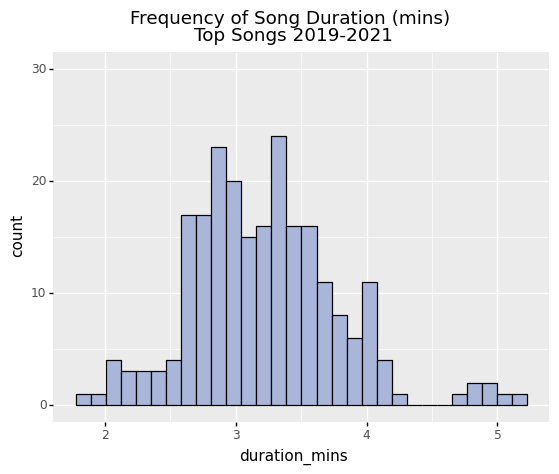

In [36]:
(
    p9.ggplot(topSongs_sorted, aes(x='duration_mins'))
    + geom_histogram(color = "black", fill = "#A9B5D9", bins = 30)+
    p9.ggtitle('Frequency of Song Duration (mins) \nTop Songs 2019-2021') +p9.scales.ylim(0,30)

).draw();

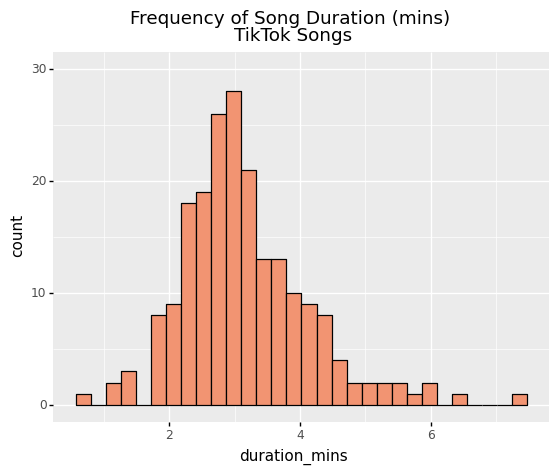

In [35]:
(
   p9.ggplot(tiktok_sorted, aes(x='duration_mins'))
    + geom_histogram(color = "black", fill = "#F29472", bins = 30) +
    p9.ggtitle('Frequency of Song Duration (mins) \nTikTok Songs')+ p9.scales.ylim(0,30)

    
).draw();

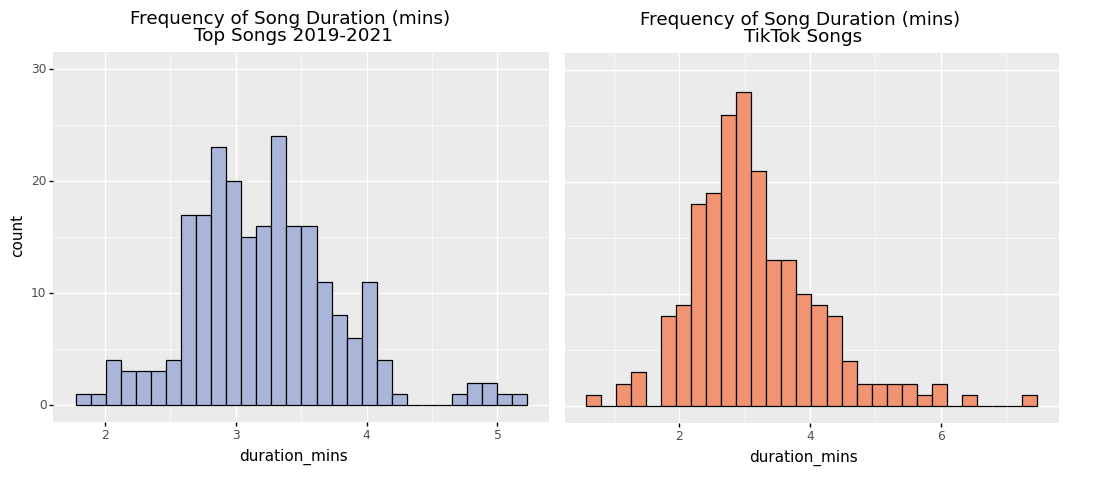

From the histograms above it appears that the duration of top songs from 2019-2021 are within the range of nearly 3 to 3.5 minutes, while the duration for tiktok songs is smaller, with greatest frequencies around 3 minutes or less. This implies that despite some great outliers for tiktok of more than 6 minutes duration, or for top songs of greater than 4 minutes duration, generally popular tiktok songs have a smaller duration in minutes. It is possible that TikTok songs may be used more often and thus become popular due to their shorter length while on Spotify users may be more likely to listen to a longer song and make it popular since there is no visual component as there is with TikTok songs.

Our next trend we intend to explore is the artists which come up as having the most number of popular tracks for both TikTok and Top Songs of the last three years. 
We will start by making sure there are no duplicates in either of the playlists, i.e. no songs that have repeated entries with different popularity values. We will do this by checking if the title of each entry of the dataframe is unique, which means it is not repeated.

In [19]:
#if the number of unique titles in tiktok data is equal to the number of titles then return True, else False
len(tiktok_sorted['title'].unique()) == len(tiktok_sorted['title'])

True

So for the `tiktok_sorted` dataframe every title is unique. Now let us see if this is the same for `topSongs`.

In [21]:
#if the number of unique titles in topSongs data is equal to the number of titles then print True, else False
print(len(topSongs_sorted['title'].unique()) == len(topSongs_sorted['title']))
topSongs_sorted.groupby(['title']).size()[topSongs_sorted.groupby(['title']).size().sort_values(ascending = False)>1]

False


title
Dance Monkey              2
Don't Start Now           2
Dynamite                  2
Heat Waves                2
Mood (feat. iann dior)    2
Need to Know              2
Shivers                   2
dtype: int64

We can see that there are six songs listed above which are repeated one more time than we need. We will now remove the duplicates, and since the dataframe is sorted by popularity we will select the entry with the higher popularity score, which comes first (lower index value).

In [23]:
topSongs_sorted = topSongs_sorted.drop_duplicates(subset="title", keep='first', inplace=False)

We write a function `getArtists()` to extract the artist names from both dataframes so that we can construct wordclouds for the artists who have the most popular songs.

In [30]:
def getArtists(df):
    '''
    Function getArtists takes in dataframe of tiktok songs sorted or Top Songs sorted
    and returns a list of all the artists in the playlist from column all_artists
    '''
    all_song_artists = []
    for i in range(len(df.all_artists.values)):
        m = re.compile(r"\w{1,20}.\w{1,20}.\w{1,20}.\w{1,20}.\w{1,20}.\w{1,20}", re.MULTILINE | re.DOTALL)
        f = m.findall(df.all_artists.values[i])
        if len(f) > 0:
            for j in range(len(f)):
                all_song_artists.append(f[j])        
    return all_song_artists

Below is the wordcloud for Top Songs 2019-2021, which has the names of top 100 artists on the list represented in larger font size if they have more popular tracks and smaller font if they have less.

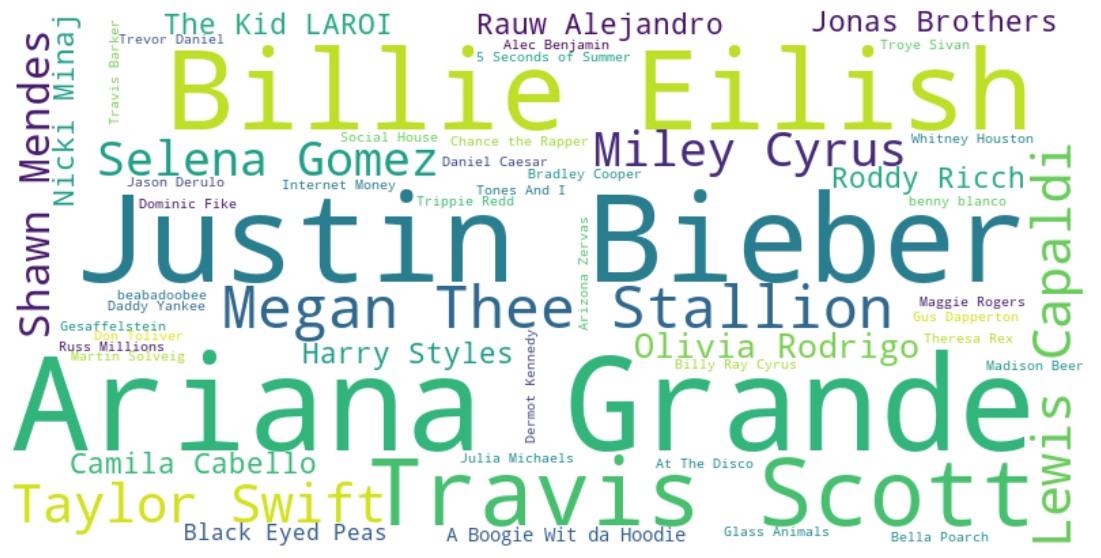

In [31]:
wc = WordCloud(background_color='white',width=800, height=400, max_words = 100).generate_from_frequencies(Counter(list(getArtists(topSongs_sorted))))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Our second wordloud below is for TikTok songs, which has the names of top 100 artists on the list represented in larger font size if they have more popular tracks and smaller font if they have less.

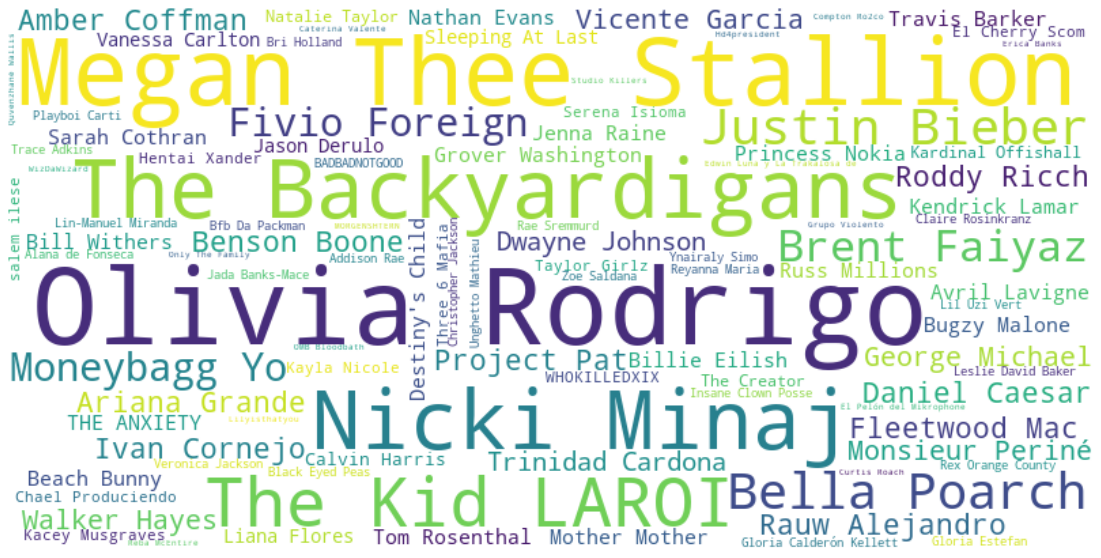

In [32]:
wc2 = WordCloud(background_color='white',width=800, height=400,max_words=100 
#                ,mask =tiktok_mask 
               ).generate_from_frequencies(Counter(list(getArtists(tiktok_sorted))))
plt.figure(figsize=(20, 10))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

From the two wordclouds above, we can see that artists The Kid LAROI, Megan Thee Stallion, Justin Bieber, Nicki Minaj, Rauw Alejandro, Olivia Rodrigo, Roddy Rich and Ariana Grande are creating a lot of popular songs that are both on Spotify's Top Songs 2019-2021 and Tiktok songs. The artists are famous and well known for their songs especially in the last three years.However, the number of artists in Tiktok songs that have small font size (second wordcloud) is much larger than the number of artists in Top Songs(first wordcloud). One reason this might be is because there are many novelty songs or songs with special auditory or cultural references that are used only in TikTok for the effect they make and may not be mainstream otherwise in Top Songs. Another reason is that some older songs from before 2019-2021 have been revived in Tiktok but are not represented as top songs of 2019-2021.